# Transactions data analysis
This notebook analyzes the provided Bank data to present the following:
* 3 Reports and Graphs of the data
* Fraud detection from the data

The snippet below installs the required dependencies.

In [25]:
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install openpyxl
!{sys.executable} -m pip install statsmodels
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install seaborn

You should consider upgrading via the '/Users/eduardo.gutierrez/Envs/assignment3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/eduardo.gutierrez/Envs/assignment3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/eduardo.gutierrez/Envs/assignment3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/eduardo.gutierrez/Envs/assignment3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/eduardo.gutierrez/Envs/assignment3/bin/python -m pip install --upgrade pip' command.


Pandas is imported to load and analyze the data.

In [111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Loading the transactions information from an excel file.

In [27]:
bank_data = pd.read_excel("CC-3Y-Transactions.xlsx")

The available columns can now be inspected by showing a sample of the first 15 rows.

In [28]:
bank_data.head(10)

,City,Date,Card Type,Exp Type,Gender,Amount
0,"Delhi, India",2014-10-29,Gold,Bills,F,82475
1,"Greater Mumbai, India",2014-08-22,Platinum,Bills,F,32555
2,"Bengaluru, India",2014-08-27,Silver,Bills,F,101738
3,"Greater Mumbai, India",2014-04-12,Signature,Bills,F,123424
4,"Bengaluru, India",2015-05-05,Gold,Bills,F,171574
5,"Delhi, India",2014-09-08,Silver,Bills,F,100036
6,"Delhi, India",2015-02-24,Gold,Bills,F,143250
7,"Greater Mumbai, India",2014-06-26,Platinum,Bills,F,150980
8,"Delhi, India",2014-03-28,Silver,Bills,F,192247
9,"Delhi, India",2014-09-01,Platinum,Bills,F,67932


Let's review the structure and information of the dataset.

In [29]:
print(bank_data.shape)
bank_data.info()

(26052, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   City       26052 non-null  object        
 1   Date       26052 non-null  datetime64[ns]
 2   Card Type  26052 non-null  object        
 3   Exp Type   26052 non-null  object        
 4   Gender     26052 non-null  object        
 5   Amount     26052 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 1.2+ MB


From the information above, it's noticeable that there are not null entries in the records for each column, since the number of non-null entries for each one is equal to the total amount shown by `RangeIndex`, 26,052.

## Report 1: Top Cities Expenses
In this section exploration is carried based on the available cities.

In [88]:
bank_data['Year'] = pd.to_datetime(bank_data["Date"]).dt.strftime('%Y')
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   City       26052 non-null  object        
 1   Date       26052 non-null  datetime64[ns]
 2   Card Type  26052 non-null  object        
 3   Exp Type   26052 non-null  object        
 4   Gender     26052 non-null  object        
 5   Amount     26052 non-null  int64         
 6   Year       26052 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 1.4+ MB


City,"Bengaluru, India","Greater Mumbai, India","Ahmedabad, India","Delhi, India","Kanpur, India"
Year,,,,,
2013,84999287,84735652,83291837,82126961,19640338


City,"Bengaluru, India","Greater Mumbai, India","Ahmedabad, India","Delhi, India","Hyderabad, India"
Year,,,,,
2014,351482095,349709415,348289187,329591186,71066005


City,"Delhi, India","Greater Mumbai, India","Ahmedabad, India","Bengaluru, India","Kolkata, India"
Year,,,,,
2015,145211065,142306409,136213286,135845357,30918731


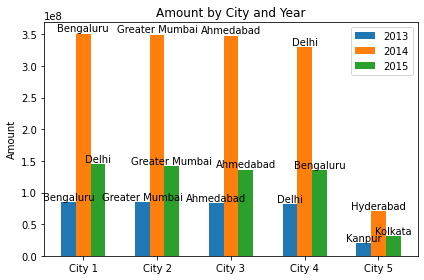

In [162]:
N = 5
x = np.arange(N)
width = 0.20

labels = [f"City {i}" for i in range(1, N+1)]
fig, ax = plt.subplots()

for idx, year in enumerate(sorted(bank_data['Year'].unique()), start=-1):
    data = bank_data[bank_data['Year'] == year].groupby(by=['Year', 'City']).agg({'Amount': 'sum'}).sort_values(by='Amount', ascending=False).head(N)

    org_columns = list(map(lambda c: c[1], data.index.values))
    display(data.pivot_table('Amount', ['Year'], 'City', sort=False)[org_columns])

    rects = ax.bar(x + (idx*width), data['Amount'], width, label=year)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Amount')
    ax.set_title('Amount by City and Year')
    ax.set_xticks(x, labels)
    ax.legend()

    for rect, label in zip(rects, data.index.values):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label[1].replace(', India', ''), ha="center", va="bottom"
        )

fig.tight_layout()

plt.show()

## Report 2: Gender Expenses Analysis
This section explores the expenses made by gender.

### Expense Type Analysis
A short analysis for the expenses types is performed to identify which unique values there are and how the observations are distributed across them.

In [106]:

bank_data["Exp Type"].unique()

array(['Bills', 'Food', 'Entertainment', 'Grocery', 'Fuel', 'Travel'],
      dtype=object)

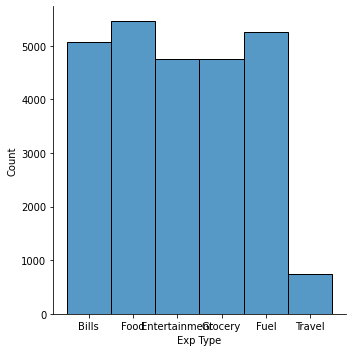

In [146]:
sns.displot(bank_data["Exp Type"])

### Card type analysis
A short analysis for the different Card types is performed to identify which unique values there are and how the observations are distributed across them.

In [121]:
bank_data["Card Type"].unique()

array(['Gold', 'Platinum', 'Silver', 'Signature'], dtype=object)

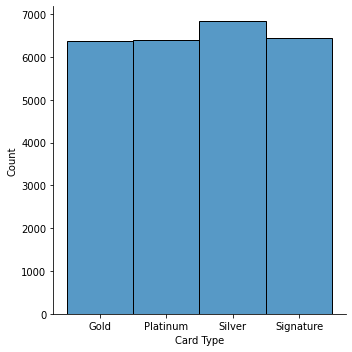

In [122]:
sns.displot(bank_data["Card Type"])

### Gender analysis
A short analysis for the Genders is performed to identify which unique values there are and how the observations are distributed across them.

In [123]:
bank_data["Gender"].unique()

array(['F', 'M'], dtype=object)

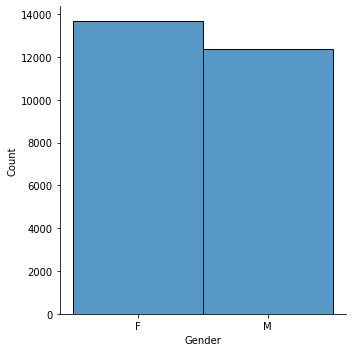

In [124]:
sns.displot(bank_data["Gender"])

### Dates analysis
A short analysis for the different dates is performed to identify which unique values there are and how the observations are distributed across them.

In [110]:
bank_data['Short date'] = pd.to_datetime(bank_data["Date"]).dt.strftime('%Y-%m')

In [117]:
sorted(bank_data['Short date'].unique())

['2013-10',
 '2013-11',
 '2013-12',
 '2014-01',
 '2014-02',
 '2014-03',
 '2014-04',
 '2014-05',
 '2014-06',
 '2014-07',
 '2014-08',
 '2014-09',
 '2014-10',
 '2014-11',
 '2014-12',
 '2015-01',
 '2015-02',
 '2015-03',
 '2015-04',
 '2015-05']

<AxesSubplot:xlabel='Short date'>

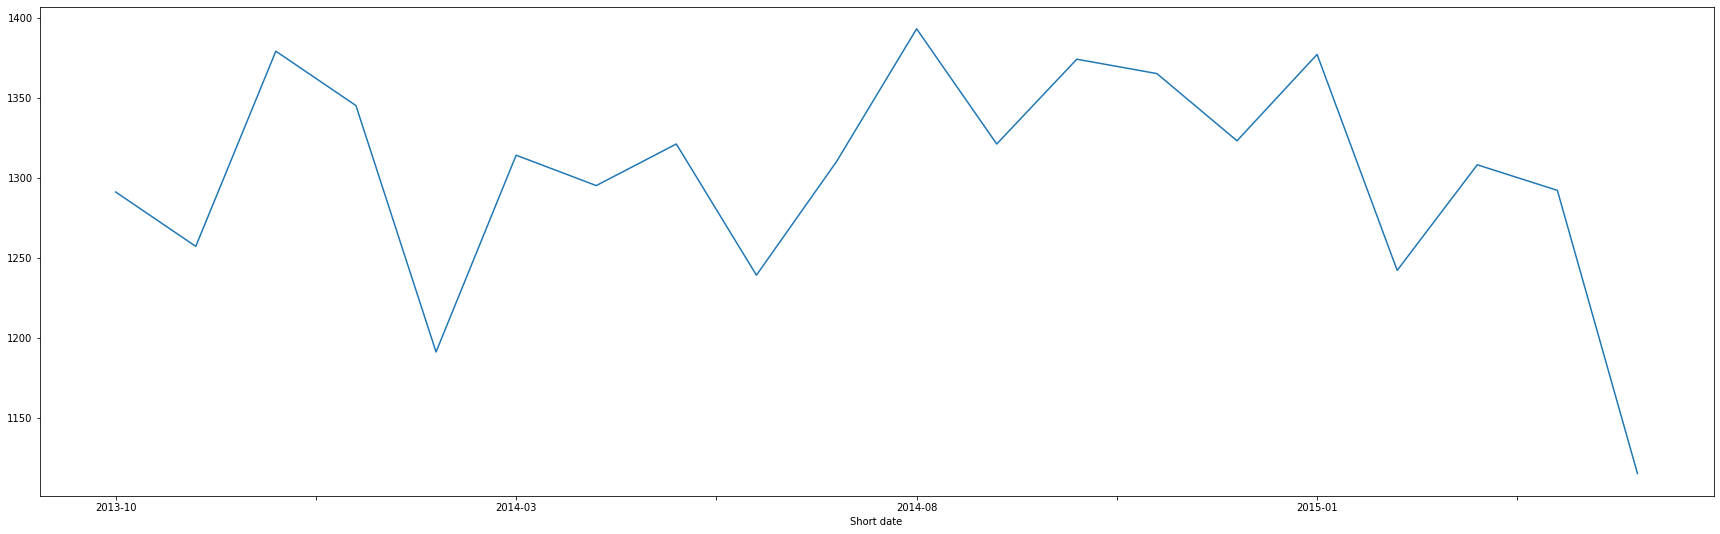

In [143]:
pyplot.figure(figsize=(30,9))
bank_data.value_counts('Short date', sort=False).plot()

In [145]:
bank_data.corr()

,Amount
Amount,1.0


## Fraud detection Report
This section focuses on detecting possible fraud transactions for the data provided.

## References
* [Simple Scatter Plots](https://jakevdp.github.io/PythonDataScienceHandbook/04.02-simple-scatter-plots.html)
* 